# Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib

In [118]:
# fm.get_fontconfig_fonts()
# font_location = 'C:\\WINDOWS\\Fonts\\malgun.ttf' # For Windows
# font_name = fm.FontProperties(fname=font_location).get_name()
# matplotlib.rc('font', family=font_name)


from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
FILES_DIR = './files/'
events = pd.read_csv(FILES_DIR + 'sampled_events.csv')
product = pd.read_csv(FILES_DIR + 'sampled_products.csv')
users = pd.read_csv(FILES_DIR + 'sampled_users.csv')

In [3]:
events.head()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID
1,f482aba7e1b76564c5404d96650f0dbd,2021-06-03 13:00:01.920001,add_to_cart,qik2Oa/1SQAjHeR64GLY0g==,+3vED/NUxtVk4Dvc0QUahA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID
2,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:00:02.35,click_item,FJJ6W70VNARaqflivNavLg==,xuuGT7/l+fld/geUzu6BkA==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
3,51e148afe55e6f296c0931cac6bc2c1d,2021-06-03 13:00:02.994,click_item,MsFi+mS5EhwSv+ZqTtZ53w==,FC0aiDVh1JjIXUschc44Pg==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Gyeongsangbuk-do,IOS
4,3316370366bdbd2fdff02e996c1b2721,2021-06-03 13:00:03.312001,add_to_cart,frWHEf/czsCEjklEIwxxKA==,yXpbzgtgRe37PEbJlBiKmQ==,mobile,Samsung,SM-G970N,Galaxy S10e,Android 11,South Korea,Seoul,ANDROID


In [8]:
events.columns

Index(['session_id', 'event_timestamp', 'event_name', 'user_no', 'item_no',
       'device_type', 'mobile_brand_name', 'mobile_model_name',
       'mobile_marketing_name', 'operating_system_version', 'country',
       'region', 'platform'],
      dtype='object')

In [4]:
product.head()

,item_no,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
0,++/211gtgspgB1TaPWEUQw==,베스트 코트\n( Vest Coat )_lavender,6842e3f320ef4459fac54dcea70c8245,1150000.0,243100100,의류,243101100,아우터,243101103,코트,4308.0,FOCEPS
1,++4eWFkX4oCtVYiKi34/Dw==,21SS 넥 페이스 패치 기모 맨투맨 블랙 CI0062 AHJ,1bdc06804580fddfbe46d4e2af140f08,466830.0,243100100,의류,243102100,상의,243102103,티셔츠,9302.0,Acne Studios_바이스트
2,++BoE+rYvLTJEAXMQFQLpQ==,[서울웰컴티 선물 세트] 일상 옥수수차,cb4a9bb103f9bd84d5d126ad4acec74b,15000.0,249100100,식품,249105100,음료,249105105,차류,4775.0,Urbanbookshop
3,++RIzj1vpFLWgoX7LgCfLQ==,PLAIN SQUARE BAG S (IV),4c3f75e886c8114d7d00d19a4f0c34d5,118000.0,244100100,잡화,244102100,가방,244102104,토트백,2546.0,zisoo
4,++W7/YMlPMwbAfyyJZEuIw==,클리어 바디미스트 150ml,5f136d4e25c837c3b658de16ac2156d9,27000.0,247100100,화장품/미용,247109100,바디케어,247109104,바디미스트,12986.0,밀크바오밥


In [5]:
users.head()

,user_no,birth_date,gender
0,++MXKfwkOw4VFn9HkVCRrw==,1994-08-25,F
1,++QhQ1e1epIwx3vRl2Jo3g==,1994-08-20,F
2,++gfxvExR4bVIl3/hWsX7Q==,1990-11-14,F
3,++hK92KjjWxhaH5fVgRFww==,1997-03-30,F
4,++izmuIS/QEffdUxvt0y4Q==,1992-09-07,F


# EDA

## events 부터 살펴보자

In [4]:
print(events.shape)

(5880407, 13)


In [5]:
print(events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880407 entries, 0 to 5880406
Data columns (total 13 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   event_timestamp           object
 2   event_name                object
 3   user_no                   object
 4   item_no                   object
 5   device_type               object
 6   mobile_brand_name         object
 7   mobile_model_name         object
 8   mobile_marketing_name     object
 9   operating_system_version  object
 10  country                   object
 11  region                    object
 12  platform                  object
dtypes: object(13)
memory usage: 583.2+ MB
None


In [6]:
"""
모바일 브랜드 네임, 모델 네임, 모델 마케팅네임 
모바일 네임이 왜이렇게 많은지 보자

"""

events.isnull().sum()

session_id                        0
event_timestamp                   0
event_name                        0
user_no                           0
item_no                           0
device_type                       0
mobile_brand_name              3594
mobile_model_name              3594
mobile_marketing_name       4250941
operating_system_version          0
country                          12
region                         2195
platform                          0
dtype: int64

In [7]:
events.head()

# 모바일 컬럼은 의미없는것같다 플래폼 컬럼만 있으면 될것같다

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID
1,f482aba7e1b76564c5404d96650f0dbd,2021-06-03 13:00:01.920001,add_to_cart,qik2Oa/1SQAjHeR64GLY0g==,+3vED/NUxtVk4Dvc0QUahA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID
2,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:00:02.35,click_item,FJJ6W70VNARaqflivNavLg==,xuuGT7/l+fld/geUzu6BkA==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
3,51e148afe55e6f296c0931cac6bc2c1d,2021-06-03 13:00:02.994,click_item,MsFi+mS5EhwSv+ZqTtZ53w==,FC0aiDVh1JjIXUschc44Pg==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Gyeongsangbuk-do,IOS
4,3316370366bdbd2fdff02e996c1b2721,2021-06-03 13:00:03.312001,add_to_cart,frWHEf/czsCEjklEIwxxKA==,yXpbzgtgRe37PEbJlBiKmQ==,mobile,Samsung,SM-G970N,Galaxy S10e,Android 11,South Korea,Seoul,ANDROID


In [8]:
events.event_name.unique()

# 클릭, 카트담기 ,좋아요, 구매
# 이 컬럼을 점수화 해서 추천시스템에 적용하면 좋을것같다
# purchase_success : 4
# add_to_cart : 3
# like_item : 2
# click_item : 1

array(['click_item', 'add_to_cart', 'purchase_success', 'like_item'],
      dtype=object)

In [9]:
print(len(events[events['event_name'] == 'click_item']))
print(len(events[events['event_name'] == 'add_to_cart']))
print(len(events[events['event_name'] == 'purchase_success']))
print(len(events[events['event_name'] == 'like_item']))

# 여전히 클릭이 제일많다
# 생각보다 좋아요가 별로 없다
# 카트 담기나 좋아요 보다 구매가 더 많은게 특이하다

4845691
353143
465253
216320


In [10]:
print(events.session_id.nunique())
print(events.user_no.nunique())

# 세션과 유저는 다르다
# 세션 : 사용자 기준에서는 취향이나 선호도를 반영하기에 더 적합
# 유저 : 사용자의 의도를 반영하기에 더 적합

1425915
254958


In [11]:
print(events.item_no.nunique())

283326


In [12]:
events.device_type.unique()

# 데스크탑이 없는게 특이하다

print(len(events[events['device_type'] == 'mobile']))
print(len(events[events['device_type'] == 'tablet']))

# tablet 데이터가 너무 적긴하다...


5853335
27072


In [13]:
# 쇼핑몰 데이터라서 그런지 여자데이터가 많아서 애플이 더 많은것 같다
# 유저 데이터에서 성별이 있는지 확인하고 여자가 많은지 남자가 많은지 확인해야한다
# 1639001/5880407 27% 안드로이드
# 4241406/5880407 72% 아이폰 약 3배차이난다

events.platform.unique()

print(len(events[events['platform'] == 'ANDROID']))
print(len(events[events['platform'] == 'IOS']))

1639001
4241406


In [14]:
# events.country.unique()
# 5880407 - 5863296 = 17111 한국데이터만 잔뜩있어서 오히려 컬럼을 지워야 할것같다


len(events[events['country'] == 'South Korea'])

5863296

In [15]:
events.region.nunique()
events.region.unique()
# 지역 컬럼이 197개나 있다... 쇼핑몰이라면 지역별로 특징이 있다고 생각한다
# 다만 경기도 산다고 해서 홍대에서 주로생활할지, 강남에서 주로 생활할지 특정하기 힘들기때문에
# 도별? 크게크게 분류하는거 아니면 큰 의미는 없다고 생각한다
# 지역에 집중하기 보다 다른 컬럼에 집중해보자

array(['Gyeonggi-do', 'Seoul', 'Gyeongsangbuk-do', 'Busan', 'Ulsan',
       'Gyeongsangnam-do', 'Chungcheongbuk-do', 'Gwangju',
       'Chungcheongnam-do', 'Jeju-do', 'Jeollanam-do', 'Daejeon',
       'Jeollabuk-do', 'Daegu', 'Gangwon-do', 'Incheon', 'Tokyo',
       'New York', 'Shanghai', 'Kanagawa', 'Tamil Nadu', nan, 'Bangkok',
       'New Jersey', 'Shandong', 'England', 'Beijing', 'New South Wales',
       'Gauteng', 'Taichung City', 'Ho Chi Minh City', 'Ile-de-France',
       'Osaka', 'Zhejiang', 'Hunan', 'Sichuan', 'Doha',
       'British Columbia', 'Hawaii', 'Zurich', 'Komarom-Esztergom',
       'Masovian Voivodeship', 'Saarland', 'Ohio', 'Chongqing',
       'Liaoning', 'Jiangsu', 'Hanoi', 'North Carolina', 'Ontario',
       'Texas', 'Baden-Wurttemberg', 'Selangor',
       'Federal Territory of Kuala Lumpur', 'North Rhine-Westphalia',
       'Aichi', 'California', 'Guangdong Province', 'Anhui', 'Nuevo Leon',
       'Kaohsiung City', 'Berlin', 'Riyadh Province', 'Abu Dhabi',
    

## users 데이터 살펴보자

In [16]:
#users row수와 event user_no 수가 같은걸로 보아 이컬럼으로 데이터를 합치면 될것같다 

users.shape

(254958, 3)

In [17]:
# 유저 데이터에는 유저넘버와 생년월일 젠더가 있다
# 원래 생물학적 sex와 gender는 다른데 우리나라 데이터면 크게 구분되지 않았을 가능성이 높다
# 생년월일 데이터를 10대, 20대, 30대 등 나눠서 데이터를 살펴보면 재미있어보인다

users.head()

,user_no,birth_date,gender
0,++MXKfwkOw4VFn9HkVCRrw==,1994-08-25,F
1,++QhQ1e1epIwx3vRl2Jo3g==,1994-08-20,F
2,++gfxvExR4bVIl3/hWsX7Q==,1990-11-14,F
3,++hK92KjjWxhaH5fVgRFww==,1997-03-30,F
4,++izmuIS/QEffdUxvt0y4Q==,1992-09-07,F


In [18]:
users.isnull().sum()

# 

user_no           0
birth_date    23676
gender        40948
dtype: int64

In [19]:
# 확실히 여자 데이터가 많다
# 163130/254958 = 0.64 여자
# 50880/254958 = 0.20 남자
# null값을 전체데이터에서 제외하더라도 약 3배정도 데이터 차이가난다

users.gender.unique()

print(len(users[users['gender'] == 'F']))
print(len(users[users['gender'] == 'M']))

163130
50880


## product 데이터 살펴보자

In [20]:
# event와 합칠수있다

product.shape

(283326, 12)

In [21]:
# image_name이 특이하다

product.columns

Index(['item_no', 'item_name', 'image_name', 'price', 'category1_code',
       'category1_name', 'category2_code', 'category2_name', 'category3_code',
       'category3_name', 'brand_no', 'brand_name'],
      dtype='object')

In [22]:
product.isnull().sum()

item_no            0
item_name          0
image_name         0
price              0
category1_code     0
category1_name     0
category2_code     0
category2_name     0
category3_code     0
category3_name     0
brand_no           3
brand_name        19
dtype: int64

In [23]:
print(product.brand_no.nunique())
print(product.brand_name.nunique())

# 차이 40개는 뭐지? null값 19 + 3개 빼도 18개 차이 나는거 뭐지?
# 사소하지만 왜 차이나는지 궁금하긴하다...ㅋㅋㅋ

7897
7857


In [24]:
print(product.item_no.nunique())
print(product.item_name.nunique())
# 3347 차이는 왜 나는거야
# 사소하니까 패스


283326
279979


In [25]:
product.head()

,item_no,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
0,++/211gtgspgB1TaPWEUQw==,베스트 코트\n( Vest Coat )_lavender,6842e3f320ef4459fac54dcea70c8245,1150000.0,243100100,의류,243101100,아우터,243101103,코트,4308.0,FOCEPS
1,++4eWFkX4oCtVYiKi34/Dw==,21SS 넥 페이스 패치 기모 맨투맨 블랙 CI0062 AHJ,1bdc06804580fddfbe46d4e2af140f08,466830.0,243100100,의류,243102100,상의,243102103,티셔츠,9302.0,Acne Studios_바이스트
2,++BoE+rYvLTJEAXMQFQLpQ==,[서울웰컴티 선물 세트] 일상 옥수수차,cb4a9bb103f9bd84d5d126ad4acec74b,15000.0,249100100,식품,249105100,음료,249105105,차류,4775.0,Urbanbookshop
3,++RIzj1vpFLWgoX7LgCfLQ==,PLAIN SQUARE BAG S (IV),4c3f75e886c8114d7d00d19a4f0c34d5,118000.0,244100100,잡화,244102100,가방,244102104,토트백,2546.0,zisoo
4,++W7/YMlPMwbAfyyJZEuIw==,클리어 바디미스트 150ml,5f136d4e25c837c3b658de16ac2156d9,27000.0,247100100,화장품/미용,247109100,바디케어,247109104,바디미스트,12986.0,밀크바오밥


In [9]:
# 가격이 0인 데이터가 있어서 삭제한다

len(product[product['price'] == 0])

15

In [27]:
product.category1_name.unique()

array(['의류', '식품', '잡화', '화장품/미용', '가구/인테리어', '디지털/가전', '생활/건강', '스포츠/레저',
       '반려동물', '키즈', '컬처', '성년의날', '홈_OLD', '여성패션_OLD', '패션잡화_OLD',
       '라이프스타일_OLD', '뷰티_OLD'], dtype=object)

## 데이터 합치기

In [28]:
events.head()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID
1,f482aba7e1b76564c5404d96650f0dbd,2021-06-03 13:00:01.920001,add_to_cart,qik2Oa/1SQAjHeR64GLY0g==,+3vED/NUxtVk4Dvc0QUahA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID
2,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:00:02.35,click_item,FJJ6W70VNARaqflivNavLg==,xuuGT7/l+fld/geUzu6BkA==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
3,51e148afe55e6f296c0931cac6bc2c1d,2021-06-03 13:00:02.994,click_item,MsFi+mS5EhwSv+ZqTtZ53w==,FC0aiDVh1JjIXUschc44Pg==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Gyeongsangbuk-do,IOS
4,3316370366bdbd2fdff02e996c1b2721,2021-06-03 13:00:03.312001,add_to_cart,frWHEf/czsCEjklEIwxxKA==,yXpbzgtgRe37PEbJlBiKmQ==,mobile,Samsung,SM-G970N,Galaxy S10e,Android 11,South Korea,Seoul,ANDROID


In [4]:
drop_events = events.copy()
drop_events.drop('country', axis=1, inplace=True)
drop_events.drop('mobile_marketing_name', axis=1, inplace=True)
drop_events.drop('mobile_brand_name', axis=1, inplace=True)
drop_events.drop('mobile_model_name', axis=1, inplace=True)
drop_events.drop('operating_system_version', axis=1, inplace=True)
drop_events['rating'] = drop_events['event_name']
re_name = {'rating' : {'click_item':1, 'like_item':2, 'add_to_cart':3, 'purchase_success':4}}
drop_events = drop_events.replace(re_name)
drop_events.dropna(axis=0, inplace=True)
df_events = drop_events.copy()


today = pd.Timestamp.now().floor('D')
users['birth_date'] = pd.to_datetime(users['birth_date'], errors='coerce')
users = users[~pd.isnull(users['birth_date'])] 
users['age'] = ((today - users['birth_date']).dt.days / 365.25).astype(int)

def age_category(age):
    age = (age // 10) * 10
    return age

users['age'] = users.age.apply(age_category)



product.dropna(axis=0, inplace=True)
product = product[product['price'] != 0]


total_df = pd.merge(df_events, users)
total_df = pd.merge(total_df, product)
total_df['birth_date'].fillna('un_birth_date', inplace=True)
total_df['gender'].fillna('un_gender', inplace=True)
total_df = total_df.dropna()
total_df.isnull().sum()

session_id         0
event_timestamp    0
event_name         0
user_no            0
item_no            0
device_type        0
region             0
platform           0
rating             0
birth_date         0
gender             0
age                0
item_name          0
image_name         0
price              0
category1_code     0
category1_name     0
category2_code     0
category2_name     0
category3_code     0
category3_name     0
brand_no           0
brand_name         0
dtype: int64

## 데이터 분석해보기

(array([2.77395e+05, 3.82000e+02, 5.60000e+01, 1.90000e+01, 4.00000e+00,
        1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([1.0000e+00, 7.9160e+02, 1.5822e+03, 2.3728e+03, 3.1634e+03,
        3.9540e+03, 4.7446e+03, 5.5352e+03, 6.3258e+03, 7.1164e+03,
        7.9070e+03]),
 <BarContainer object of 10 artists>)

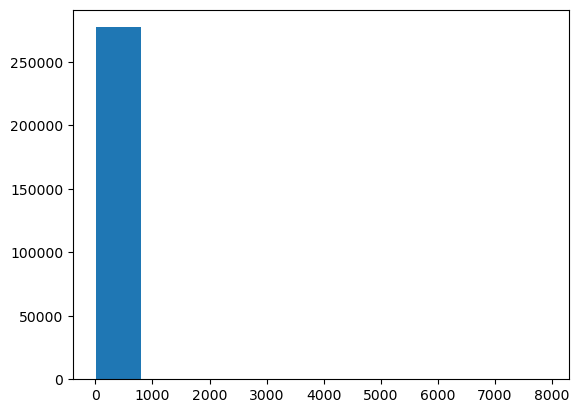

In [30]:
grouped = total_df.groupby('item_no')
session_id_hist = grouped['session_id'].count().sort_values(ascending=False)
plt.hist(session_id_hist)

# 좌측으로 많이 쏠린 데이터
# 그래도 몇백개씩 세션이 있다


(array([2.77395e+05, 3.82000e+02, 5.60000e+01, 1.90000e+01, 4.00000e+00,
        1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([1.0000e+00, 7.9160e+02, 1.5822e+03, 2.3728e+03, 3.1634e+03,
        3.9540e+03, 4.7446e+03, 5.5352e+03, 6.3258e+03, 7.1164e+03,
        7.9070e+03]),
 <BarContainer object of 10 artists>)

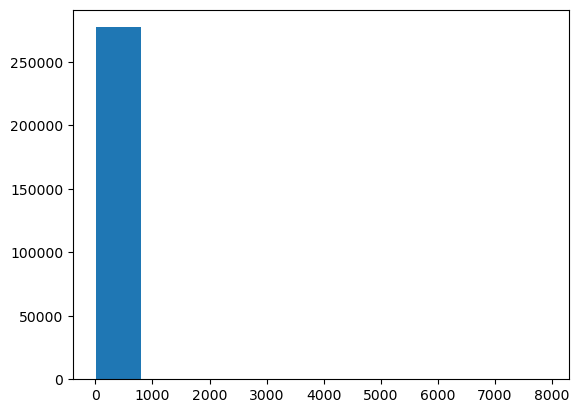

In [31]:
grouped = total_df.groupby('item_no')
user_no_hist = grouped['user_no'].count().sort_values(ascending=False)
plt.hist(user_no_hist)

# 세션이랑 유저랑 크게 다르지 않다

In [32]:
grouped = total_df.groupby('age')
user_no_hist = grouped['session_id'].count().sort_values(ascending=False)
user_no_hist

# plt.hist(user_no_hist)
# 30대랑 20대가 가장 많고 10대가 많이 없는것이 특징? 적이다
# 유저로 대입해봐도 똑같이 나온다

age
30    2267563
20    1992880
40     997590
50     208039
60      35553
10      31632
70       8225
80        963
90        216
0          26
Name: session_id, dtype: int64

In [14]:
grouped = total_df.groupby('category1_name')
user_no_hist = grouped['session_id'].count().sort_values(ascending=False)
user_no_hist

# 카테고리별로는 큰 특징을 찾기 어렵다

category1_name
의류            3373018
잡화            1380770
생활/건강          249468
가구/인테리어        199977
디지털/가전         128602
화장품/미용          70340
식품              45393
스포츠/레저          41799
컬처              30552
키즈              10162
반려동물             9113
성년의날             3222
홈_OLD             225
패션잡화_OLD           26
라이프스타일_OLD         14
뷰티_OLD              3
여성패션_OLD            3
Name: session_id, dtype: int64

In [15]:
success = total_df[total_df['event_name'] == 'purchase_success']

userid_rating_df = pd.DataFrame({'count': success.groupby(['price', 'event_name']).size()})
userid_rating_df = userid_rating_df.reset_index()
print(userid_rating_df.head(10).sort_values(by='count', ascending=False))

print('평균: ', userid_rating_df['count'].mean())
print('표준편차: ', userid_rating_df['count'].std())


   price        event_name  count
6  600.0  purchase_success     44
8  800.0  purchase_success     34
7  700.0  purchase_success     31
1  400.0  purchase_success      7
3  500.0  purchase_success      7
0  200.0  purchase_success      6
5  590.0  purchase_success      4
9  900.0  purchase_success      4
2  450.0  purchase_success      2
4  550.0  purchase_success      2
평균:  268.94756323257246
표준편차:  1050.7507781895597


In [35]:
click_item = total_df[total_df['event_name'] == 'click_item']

userid_rating_df = pd.DataFrame({'count': click_item.groupby(['price', 'age']).size()})
userid_rating_df = userid_rating_df.reset_index()
print(userid_rating_df.head(10).sort_values(by='count', ascending=False))

print('평균: ', userid_rating_df['count'].mean())
print('표준편차: ', userid_rating_df['count'].std())


   price  age  count
7  500.0   20     11
9  500.0   40      8
8  500.0   30      6
2  400.0   20      4
3  400.0   30      4
0  200.0   20      3
1  350.0   20      1
4  400.0   40      1
5  400.0   50      1
6  450.0   20      1
평균:  346.6315749583144
표준편차:  2185.07960201288


In [36]:
success = total_df[total_df['event_name'] == 'purchase_success']

userid_rating_df = pd.DataFrame({'count': success.groupby(['item_no', 'event_name']).size()})
userid_rating_df = userid_rating_df.reset_index()
print(userid_rating_df.head(10).sort_values(by='count', ascending=False))

print('평균: ', userid_rating_df['count'].mean())
print('표준편차: ', userid_rating_df['count'].std())


# 생각보다 1개의 아이템이 많이 팔리지는 않는다

                    item_no        event_name  count
6  ++J/y7daNUk0gVvuZAyv3w==  purchase_success     19
9  ++PeNgz1/ylhHwdLJ6rzMQ==  purchase_success     17
1  ++7oV/qkvf58jMwbHbxBZw==  purchase_success      4
5  ++HduK4HOJH2LXbgWwEf7Q==  purchase_success      4
3  ++AdlsCw7chh7POHUPbjOQ==  purchase_success      2
8  ++M/vQ2omwiRuFlSZk6Q+g==  purchase_success      2
0  ++5FGY/u5kpj5Wsu9ADhsg==  purchase_success      1
2  ++9onDBer+eniIlwCZ8xnA==  purchase_success      1
4  ++BoE+rYvLTJEAXMQFQLpQ==  purchase_success      1
7  ++KnGAHePrFDjX5hficy7w==  purchase_success      1
평균:  6.464759701647464
표준편차:  39.4136760480725


In [37]:
click_item = total_df[total_df['event_name'] == 'click_item']

userid_rating_df = pd.DataFrame({'count': click_item.groupby(['item_no', 'event_name']).size()})
userid_rating_df = userid_rating_df.reset_index()
print(userid_rating_df.head(10).sort_values(by='count', ascending=False))

print('평균: ', userid_rating_df['count'].mean())
print('표준편차: ', userid_rating_df['count'].std())

# 클릭도 많이 일어나지 않는다

                    item_no  event_name  count
9  ++6N+AiT2inDY9DNU/t1nA==  click_item     42
8  ++5FGY/u5kpj5Wsu9ADhsg==  click_item     22
7  ++4eWFkX4oCtVYiKi34/Dw==  click_item      5
5  ++1kmnFL/cF6tAFvzlMvDQ==  click_item      4
2  ++/oZLr1Aahe62Q4buzNHQ==  click_item      2
6  ++33T/V4TKok+MQ71IvWDA==  click_item      2
0  +++aQH5NnhiU/9qECKk3uQ==  click_item      1
1  ++/211gtgspgB1TaPWEUQw==  click_item      1
3  ++0uJeG3WnIh1F984zdjXA==  click_item      1
4  ++1ZYovIoZ2w8B1UO5pCuQ==  click_item      1
평균:  17.504447438321456
표준편차:  62.37696332726732


In [16]:
success = total_df[total_df['event_name'] == 'purchase_success'] # click_item
success = success[success['age'] == 30] # 30, 40, 50

userid_rating_df = pd.DataFrame({'count': success.groupby(['item_no', 'age']).size()})
userid_rating_df = userid_rating_df.reset_index()
print(userid_rating_df.head(10).sort_values(by='count', ascending=False))

print('평균: ', userid_rating_df['count'].mean())
print('표준편차: ', userid_rating_df['count'].std())

                    item_no  age  count
6  ++PeNgz1/ylhHwdLJ6rzMQ==   30     17
4  ++J/y7daNUk0gVvuZAyv3w==   30     12
8  ++X9xLHmeri+TUNYE0MktQ==   30      4
9  ++fxn7AEYdO/ZwQ7Daf8jQ==   30      3
0  ++7oV/qkvf58jMwbHbxBZw==   30      2
1  ++9onDBer+eniIlwCZ8xnA==   30      1
2  ++BoE+rYvLTJEAXMQFQLpQ==   30      1
3  ++HduK4HOJH2LXbgWwEf7Q==   30      1
5  ++KnGAHePrFDjX5hficy7w==   30      1
7  ++WTYV/Vt/wFG/hSjL9aRg==   30      1
평균:  4.455787781350482
표준편차:  20.59283060908328


In [39]:
success = total_df[total_df['event_name'] == 'purchase_success'] # click_item

userid_rating_df = pd.DataFrame({'count': success.groupby(['category2_name', 'event_name']).size()}) #category1_name, category3_name
userid_rating_df = userid_rating_df.reset_index()
print(userid_rating_df.head(10).sort_values(by='count', ascending=False))

print('평균: ', userid_rating_df['count'].mean())
print('표준편차: ', userid_rating_df['count'].std())


# 카테고리1, 3에서는 특별한걸 찾지못함
# 카테고리2에서 가방이 많이 팔린것을 보아 가방회사인것같다

  category2_name        event_name  count
2             가방  purchase_success  27337
0           가공식품  purchase_success   1992
7           계절가전  purchase_success   1349
3         강아지 용품  purchase_success    782
5           건강식품  purchase_success    749
6         건강측정용품  purchase_success    267
4           거실가구  purchase_success    187
8         고양이 용품  purchase_success    122
1         가구_OLD  purchase_success     27
9        공학기기/용품  purchase_success      1
평균:  4738.739130434783
표준편차:  14917.875150574304


In [40]:
success = total_df[total_df['event_name'] == 'purchase_success'] # click_item

userid_rating_df = pd.DataFrame({'count': success.groupby(['brand_name', 'event_name']).size()}) 
userid_rating_df = userid_rating_df.reset_index()
print(userid_rating_df.head(10).sort_values(by='count', ascending=False))

print('평균: ', userid_rating_df['count'].mean())
print('표준편차: ', userid_rating_df['count'].std())

#0100 브랜드가 가장많이 팔린다 0100침구?가구 회사이다
# -rysm이 가장많이 클릭됐다 -rysm은 여성의류 사이트

         brand_name        event_name  count
6              0100  purchase_success    125
4             -rysm  purchase_success     46
1        #difff(디프)  purchase_success     34
2        &tradition  purchase_success     15
9            1'SOFT  purchase_success     14
0     #L_ENGAGEMENT  purchase_success     13
7        02 ARMOIRE  purchase_success      8
5  00000 (YOUNG OH)  purchase_success      3
8             0426x  purchase_success      3
3         (407)Haus  purchase_success      1
평균:  80.16991541007724
표준편차:  344.3575180517528


In [7]:
total_df.gender.value_counts()

F            4342347
M             834053
un_gender     366287
Name: gender, dtype: int64

In [41]:
# success = total_df[total_df['event_name'] == 'purchase_success'] # click_item

userid_rating_df = pd.DataFrame({'count': total_df.groupby(['platform', 'gender']).size()}) 
userid_rating_df = userid_rating_df.reset_index()
print(userid_rating_df.head(10).sort_values(by='count', ascending=False))

print('평균: ', userid_rating_df['count'].mean())
print('표준편차: ', userid_rating_df['count'].std())

# 아이폰이 남자여자 할것없이 많다

  platform     gender    count
3      IOS          F  3195543
0  ANDROID          F  1146804
4      IOS          M   557225
1  ANDROID          M   276828
5      IOS  un_gender   246838
2  ANDROID  un_gender   119449
평균:  923781.1666666666
표준편차:  1172071.2538059137


In [42]:
userid_rating_df = pd.DataFrame({'count': total_df.groupby(['session_id', 'event_name']).size()}) 
userid_rating_df = userid_rating_df.reset_index()
print(userid_rating_df.head(10).sort_values(by='count', ascending=False))

print('평균: ', userid_rating_df['count'].mean())
print('표준편차: ', userid_rating_df['count'].std())


                         session_id        event_name  count
2  0000193a728fd00b6cff91b8840bbf8d        click_item     11
4  000051f32d02c8a53b43a686969676e6        click_item      6
6  00005d011db80a956aab176cc94d1d37        click_item      3
8  000093856b4e947511870f3e10464129        click_item      3
0  0000104cd168386a335ba6bf6e32219d       add_to_cart      1
1  0000180e94707c0d90547614c17076bf  purchase_success      1
3  00003e3b9e5336685200ae85d21b4f5e        click_item      1
5  000053b1e684c9e7ea73727b2238ce18        click_item      1
7  00007c55a9a7591b98a76d79216c9112        click_item      1
9  0000a0f5746d603088ac968c91b085b5        click_item      1
평균:  3.551954838986684
표준편차:  5.06700733443467


In [43]:
print('가격의 평균: ', total_df['price'].mean())
print('가격의 표준편차: ', total_df['price'].std())



가격의 평균:  94752.98199212765
가격의 표준편차:  116444.61740024324


In [44]:
print('이벤트의 평균: ', total_df['rating'].mean())
print('이벤트의 표준편차: ', total_df['rating'].std())



이벤트의 평균:  1.3923649305833072
이벤트의 표준편차:  0.9114401951005893


# 데이터 csv 파일로 만들기

In [45]:
total_df = total_df.sample(frac=0.003, random_state=42)
total_df

,session_id,event_timestamp,event_name,user_no,item_no,device_type,region,platform,rating,birth_date,...,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
2255797,c8c66cdfc2286951af36bd11f26575f2,2021-06-11 00:36:40.265024,click_item,5cDoQ298+z7/vx/fNVoZFw==,NdCPDxLau3caXTbPoO2KFA==,mobile,Seoul,IOS,1,1976-05-10,...,0e8ff9cc6221b8c4c060786c1c2e0bc5,198000.0,243100100,의류,243103100,원피스/점프수트,243103101,원피스,3739.0,avamolli
4183409,35101c1b373142946d4ab22787a809b9,2021-06-29 11:47:03.741037,click_item,moLuwbMr1ZLKJoBHmRgCqg==,9viu9/Vp1NMnPXgmvxKdrw==,mobile,Seoul,ANDROID,1,1961-03-20,...,a6997ae34edb96e42ffbbccdd1a1b00a,58000.0,243100100,의류,243104100,하의,243104101,바지,13865.0,ucberkeley
375000,5c901cfba8cf2c4d25b638aef513a52a,2021-07-11 22:31:42.904002,click_item,QA9tQMeKUyUIgAKlbSfpYw==,1B4CTtvF1BeNFZzrdtx4vQ==,mobile,Gangwon-do,IOS,1,1987-09-23,...,dc38dced60dfa3a5ac19d367bb10a3c5,67500.0,243100100,의류,243104100,하의,243104101,바지,2649.0,THOMASMORE
5456436,58ac3e65ccf2eb4988b58208f252d359,2021-08-02 19:09:15.173024,click_item,bCMrhzWWzYxzqInKRUFzew==,ZnZNKHuqlz863Bo1wkKcLw==,mobile,Daegu,IOS,1,2000-03-28,...,ada54816bc84fde22196b7df843ed754,39900.0,244100100,잡화,244106100,주얼리,244106103,목걸이,11744.0,CLUE
4704356,990ecc138c1cbd618aca7cfd08cd1aa8,2021-07-18 16:15:52.274029,click_item,/B+O3jb7d/LeH4nKOZDpKg==,11ZJqzJf0OKHy5xVWscPrw==,mobile,Gyeongsangnam-do,IOS,1,1982-04-16,...,913e07943fe547acfdd1be8939c10e9b,59000.0,248100100,가구/인테리어,248112100,커튼/블라인드,248112102,커튼/로만세트,7726.0,에이미루시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5061676,010a10c3d038a9778b054616988a3840,2021-07-15 18:54:19.918064,click_item,OKOXQiBMaEet0w4tVwlrCw==,bMgc9d9iMOXMI1H+JkdHYw==,mobile,Seoul,IOS,1,1994-01-22,...,dedbd76d8592b0e91b1786b8f329c106,49900.0,243100100,의류,243102100,상의,243102103,티셔츠,13304.0,polham
3202842,bfdb2e825c648d3153a5709492f925a0,2021-06-23 18:10:56.236026,click_item,DYhM5p/b/7nkhUZCJvXj5A==,z10Ej/yvd1gRFxX6rl0XKQ==,mobile,Seoul,IOS,1,1991-03-14,...,5dec0844e00c4b5266d97d331d972e85,33220.0,243100100,의류,243104100,하의,243104101,바지,6632.0,toii
3483006,e7cee6d0db15ce5cf52189c0053a93e8,2021-07-31 12:40:03.685106,click_item,9j/RJVy3uuEiJ7NBZlZAYQ==,OWkbrvUMsJWYui+puYQhog==,mobile,Seoul,IOS,1,1998-12-16,...,2914aa53f6b0a5a5f57975a56b95f89d,85000.0,243100100,의류,243103100,원피스/점프수트,243103101,원피스,6513.0,LOEIL
4850591,0adcbc4783699832ad6b28be1c43ba2e,2021-06-17 23:39:19.132287,click_item,IQK+nUnF4vCXQvmQynWMxA==,cGRjS4mif2FbMt2O3ON1QA==,mobile,Gyeonggi-do,IOS,1,1993-03-30,...,6ba8a2c057d662d2f2ea9808b781d45b,42000.0,243100100,의류,243102100,상의,243102103,티셔츠,4630.0,Un Bon Collector


In [47]:
total_df.to_csv('tatal.csv')



- 데이터 합칠수 있는 데이터다
- 성별 차이나 플랫폼 차이나 3배씩 나는것도 특이하다
- 데스크탑 데이터가 없고 거의 모바일 데이터라고 보면될것같다
- event_name별로 베스트셀러를 찾아도 재미있을것같다
- event_name 점수로 환산해서 추천시스템을 만들어보자
- 데이터가 커서 어느정도 샘플링해서 사용해야할것같다
- 베스트 셀러는 의미가 없다
- 나이대별로 특별한 가격대를 선호하는건 찾지못했다
- 나이대별로 특별한 선호하는 아이템도 찾지 못했다
- 플랫폼별로 아이폰이 남자여자 할거없이 많다
- 브랜드top1 클릭은 여성의류 브랜드, 구매는 가구
- 클릭과 구매에서 가방카테고리가 압도적 1등이다. 브랜드별로는 큰 특징은 없지만 카테고리에서는 가방이 압도적이다
- 20, 30대 고객이 압도적으로 많다
- 특정한 1명의 유저나 세션이 아이템을 많이 클릭하거나 사거나 하는 데이터는 찾지못했다
- 다만 거의 모든 유저가 10번이하의 클릭이나 구매데이터를 가지고있기 때문에 
- 특정 한 유저가 몇천개의 데이터를 가지고있긴한데 대부분은 1000개 이하의 데이터를 가지고있다



# 피쳐추가

## origin

In [3]:
drop_events = events.copy()
drop_events.drop('mobile_marketing_name', axis=1, inplace=True)
drop_events.drop('mobile_brand_name', axis=1, inplace=True)
drop_events.drop('mobile_model_name', axis=1, inplace=True)
drop_events.drop('operating_system_version', axis=1, inplace=True)
drop_events['rating'] = drop_events['event_name']
re_name = {'rating' : {'click_item':0.1, 'like_item':0.2, 'add_to_cart':0.3, 'purchase_success':1}}
drop_events = drop_events.replace(re_name)
drop_events.dropna(axis=0, inplace=True)


users_df = users.copy()
users_df['birth_date'].fillna('un_birth_date', inplace=True)
users_df['gender'].fillna('un_gender', inplace=True)

product_df = product.copy()
product_df = product_df[product_df['price'] != 0]
product_df.dropna(axis=0, inplace=True)


origin = pd.merge(drop_events, users_df)
origin = pd.merge(origin, product_df)
origin.isnull().sum()

session_id         0
event_timestamp    0
event_name         0
user_no            0
item_no            0
device_type        0
country            0
region             0
platform           0
rating             0
birth_date         0
gender             0
item_name          0
image_name         0
price              0
category1_code     0
category1_name     0
category2_code     0
category2_name     0
category3_code     0
category3_name     0
brand_no           0
brand_name         0
dtype: int64

In [4]:
origin = origin.sample(frac=0.003, random_state=42)
origin.to_csv('origin.csv')

## 나이대별 피쳐 추가

In [5]:
drop_events = events.copy()
drop_events.drop('mobile_marketing_name', axis=1, inplace=True)
drop_events.drop('mobile_brand_name', axis=1, inplace=True)
drop_events.drop('mobile_model_name', axis=1, inplace=True)
drop_events.drop('operating_system_version', axis=1, inplace=True)
drop_events['rating'] = drop_events['event_name']
re_name = {'rating' : {'click_item':0.1, 'like_item':0.2, 'add_to_cart':0.3, 'purchase_success':1}}
drop_events = drop_events.replace(re_name)
drop_events.dropna(axis=0, inplace=True)

users_df = users.copy()
users_df['birth_date'].fillna('un_birth_date', inplace=True)
users_df['gender'].fillna('un_gender', inplace=True)

today = pd.Timestamp.now().floor('D')
users_df['birth_date'] = pd.to_datetime(users_df['birth_date'], errors='coerce')
users_df = users_df[~pd.isnull(users_df['birth_date'])] 
users_df['age'] = ((today - users_df['birth_date']).dt.days / 365.25).astype(int)

def age_category(age):
    if age < 10:
        return 5
    elif age >= 10  and age < 15:      
        return 10
    elif age >= 15  and age < 20:      
        return 15
    elif age >= 20  and age < 25:      
        return 20
    elif age >= 25  and age < 30:      
        return 25
    elif age >= 30  and age < 40:      
        return 30
    elif age >= 40:      
        return 40
    else:
        return (age // 10) * 10

# def age_category(age):
#     age = (age // 10) * 10
#     return age

users_df['age'] = users_df.age.apply(age_category)


product_df = product.copy()
product_df = product_df[product_df['price'] != 0]
product_df.dropna(axis=0, inplace=True)


og_age_df = pd.merge(drop_events, users_df)
og_age_df = pd.merge(og_age_df, product_df)
og_age_df.isnull().sum()

session_id         0
event_timestamp    0
event_name         0
user_no            0
item_no            0
device_type        0
country            0
region             0
platform           0
rating             0
birth_date         0
gender             0
age                0
item_name          0
image_name         0
price              0
category1_code     0
category1_name     0
category2_code     0
category2_name     0
category3_code     0
category3_name     0
brand_no           0
brand_name         0
dtype: int64

In [6]:
og_age = og_age_df.sample(frac=0.003, random_state=42)
og_age.to_csv('og_age.csv')

## 유저아이디 아웃라이어 제거

In [43]:
drop_events = events.copy()
drop_events.drop('mobile_marketing_name', axis=1, inplace=True)
drop_events.drop('mobile_brand_name', axis=1, inplace=True)
drop_events.drop('mobile_model_name', axis=1, inplace=True)
drop_events.drop('operating_system_version', axis=1, inplace=True)
drop_events['rating'] = drop_events['event_name']
re_name = {'rating' : {'click_item':0.1, 'like_item':0.2, 'add_to_cart':0.3, 'purchase_success':1}}
drop_events = drop_events.replace(re_name)
drop_events.dropna(axis=0, inplace=True)

userid_rating_df = pd.DataFrame({'count': drop_events.groupby('user_no').size()})
userid_rating_df.sort_values(by='count', ascending=False)
user_dw = userid_rating_df[userid_rating_df['count'] < 1000]
in_user_list = list(set(user_dw.index.to_list()))
drop_events = drop_events[drop_events['user_no'].isin(in_user_list)]


users_df = users.copy()
users_df['birth_date'].fillna('un_birth_date', inplace=True)
users_df['gender'].fillna('un_gender', inplace=True)

today = pd.Timestamp.now().floor('D')
users_df['birth_date'] = pd.to_datetime(users_df['birth_date'], errors='coerce')
users_df = users_df[~pd.isnull(users_df['birth_date'])] 
users_df['age'] = ((today - users_df['birth_date']).dt.days / 365.25).astype(int)

def age_category(age):
    if age < 10:
        return 5
    elif age >= 10  and age < 15:      
        return 10
    elif age >= 15  and age < 20:      
        return 15
    elif age >= 20  and age < 25:      
        return 20
    elif age >= 25  and age < 30:      
        return 25
    elif age >= 30  and age < 40:      
        return 30
    elif age >= 40:      
        return 40
    else:
        return (age // 10) * 10

# def age_category(age):
#     age = (age // 10) * 10
#     return age

users_df['age'] = users_df.age.apply(age_category)


product_df = product.copy()
product_df = product_df[product_df['price'] != 0]
product_df.dropna(axis=0, inplace=True)


og_age_in = pd.merge(drop_events, users_df)
og_age_in = pd.merge(og_age_in, product_df)
og_age_in.isnull().sum()

session_id         0
event_timestamp    0
event_name         0
user_no            0
item_no            0
device_type        0
country            0
region             0
platform           0
rating             0
birth_date         0
gender             0
age                0
item_name          0
image_name         0
price              0
category1_code     0
category1_name     0
category2_code     0
category2_name     0
category3_code     0
category3_name     0
brand_no           0
brand_name         0
dtype: int64

In [44]:
# og_age_in = og_age_in.sample(frac=0.003, random_state=42)
og_age_in.to_csv('og_age_in.csv')

## 요일 피쳐 생성

In [45]:
og_age_in['event_timestamp'] = pd.to_datetime(og_age_in['event_timestamp'])

og_age_in['dayname'] = og_age_in['event_timestamp'].dt.day_name()

In [46]:
df_day_name = og_age_in.copy()
df_day_name.to_csv('df_day_name.csv')

## 한국과 한국과 아닌컬럼 나누기

In [47]:
df_day_name["korea"] = np.where((df_day_name['country'] == 'South Korea'), 1,0)

In [ ]:
df_korea = df_day_name.copy()
df_korea.to_csv('df_korea.csv')

# 전체적인 feature 정리

In [ ]:
def corr_heat(df):
    sns.set(rc = {'figure.figsize':(15,6)}, font_scale = 1)
    sns.heatmap(data = df.corr(), annot=True, linewidths=1)

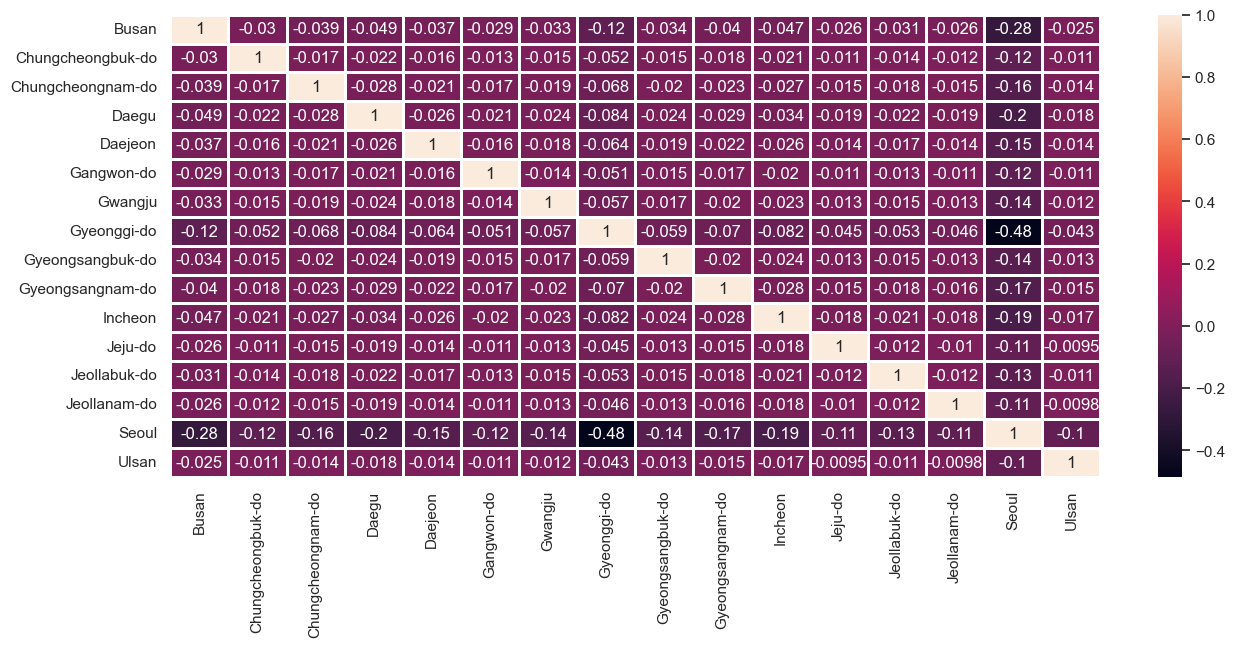

In [52]:
kor = og_age_df[og_age_df['country'] == 'South Korea']
kor_suc = kor[kor['event_name'] == 'purchase_success']
kor_region = kor_suc['region'].str.get_dummies(sep=',')

corr_heat(kor_region)

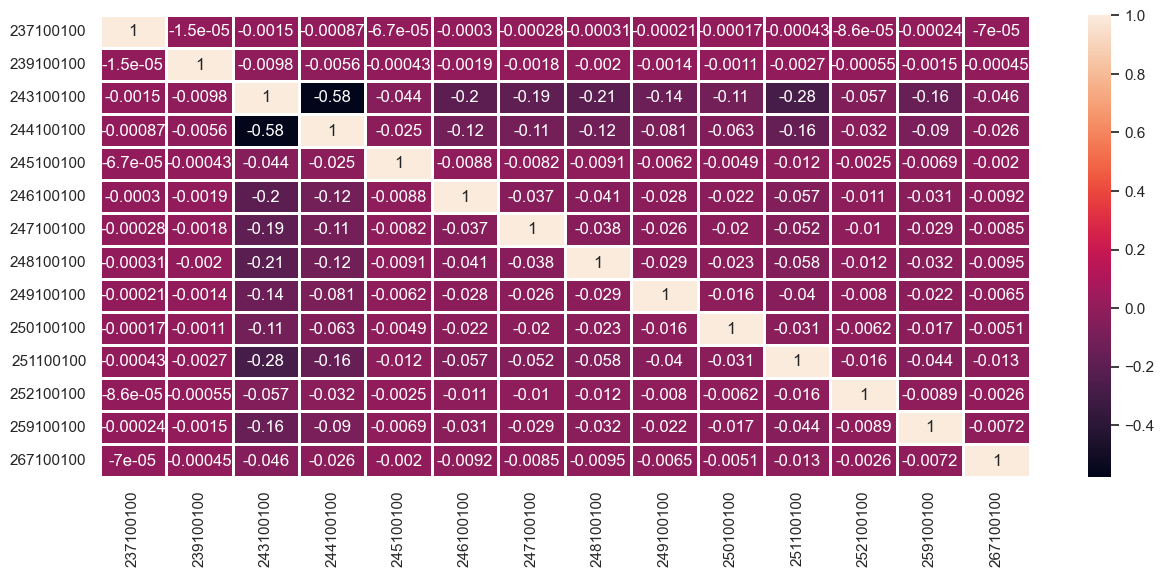

In [59]:
cat_df = og_age_df[og_age_df['event_name'] == 'purchase_success']
cat = pd.get_dummies(cat_df['category1_code'])
corr_heat(cat)

# 244100100 잡화
# 243100100 의류

In [ ]:
df_korea['cor_cat1'] = np.where((df_korea['category1_code'] == 244100100)&(df_korea["category1_code"].values == 243100100) , 0.7, 0)
df_korea['cor_region'] = np.where((df_korea['region'] == 'Seoul')&(df_korea["region"].values == 'Gyeonggi-do') , 0.5, 0)
cat_df = df_korea.copy()

In [ ]:
cat_df.to_csv('cat_df.csv')

In [ ]:
df_korea["Hour"] = df_korea['event_timestamp'].dt.hour
df_korea['Hour'] = df_korea['Hour'].replace(0, 24)


In [ ]:
df_korea['time_1'] = np.where((df_korea['Hour'] >= 2)&(df_korea["Hour"].values <= 6) , 1, 0)
df_korea['time_2'] = np.where((df_korea['Hour'] >= 7)&(df_korea["Hour"].values <= 18) , 1, 0)
df_korea['time_3'] = np.where((df_korea['Hour'] > 18)&(df_korea["Hour"].values == 1) , 1, 0)
time_df = df_korea.copy()

In [ ]:
time_df.to_csv('time_df.csv')

In [42]:
Eco_df = time_df.copy()
Eco_df.to_csv('Eco_df.csv')